# Raster Data Analysis

In [61]:
import rasterio, matplotlib.pyplot as plt, numpy as np
from rasterio.plot import show

The GeoTIFF image used is an aerial view of Mount Mabu in Mozambique. For more information about the image, see https://photojournal.jpl.nasa.gov/catalog/PIA26392

In [48]:
filepath = "PIA26392.tif"

### Loading GeoTIFF Image

In [49]:
raster = rasterio.open(filepath)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/rasterio/__init__.py:355: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


In [50]:
raster.count # number of bands

3

In [51]:
raster.meta

{'driver': 'GTiff',
 'dtype': 'uint8',
 'nodata': None,
 'width': 1777,
 'height': 1921,
 'count': 3,
 'crs': None,
 'transform': Affine(1.0, 0.0, 0.0,
        0.0, 1.0, 0.0)}

### Reading raster bands

In [52]:
array = raster.read()

In [53]:
array.shape

(3, 1921, 1777)

It tells us that there are 1921 rows and 1777 columns in the band array

In [58]:
band1 = raster.read(1)

band1

array([[133, 139, 142, ..., 136, 112, 106],
       [131, 145, 153, ..., 126, 106, 110],
       [127, 144, 152, ..., 128, 112, 118],
       ...,
       [116, 124, 116, ...,  94,  88,  94],
       [113, 125, 125, ..., 120, 100, 106],
       [124, 123, 124, ..., 121, 128, 125]], dtype=uint8)

Getting band statistics:

In [57]:
stats = []

for band in array:
    stats.append({
        'min': band.min(),
        'mean': band.mean(),
        'median': np.median(band),
        'max': band.max()})

stats

[{'min': 0, 'mean': 87.46620080694466, 'median': 87.0, 'max': 255},
 {'min': 8, 'mean': 124.91302392740603, 'median': 124.0, 'max': 255},
 {'min': 0, 'mean': 99.14445791663212, 'median': 102.0, 'max': 255}]

### Visualization

From the specifications of the ASTER satellite spectral bands(see more in https://www.satimagingcorp.com/satellite-sensors/other-satellite-sensors/aster/), we set band 1 as colour green and band 2 as colour red

<Axes: title={'center': 'Band 2'}>

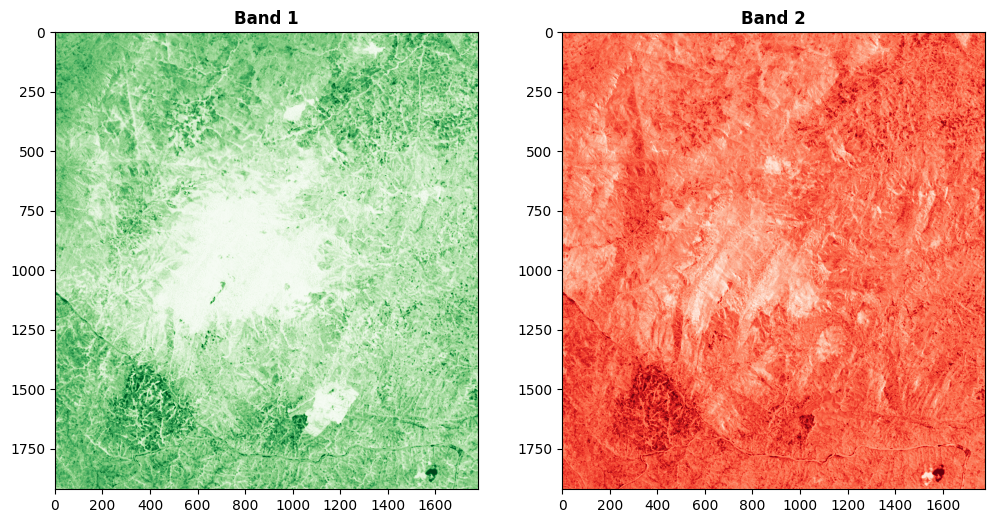

In [68]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))
show((raster,1), cmap='Greens', title='Band 1', ax=ax1)
show((raster,2), cmap='Reds', title='Band 2', ax=ax2)